In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch

import promonet

/home/mrm5248/micromamba/envs/promonet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


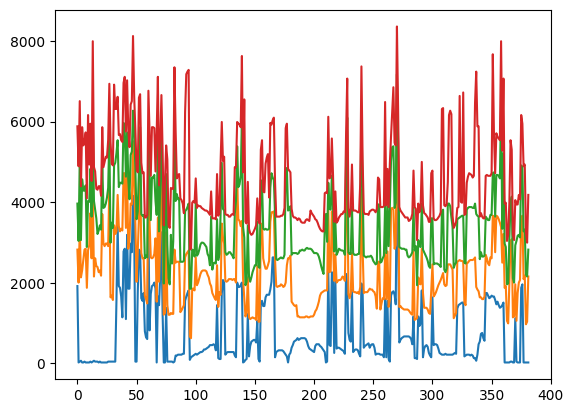

In [3]:
# Original
original_audio = promonet.load.audio('original.wav')
pitch, periodicity = promonet.preprocess.from_audio(
    original_audio,
    gpu=0,
    features=['pitch', 'periodicity'])
pitch, periodicity = pitch.cpu(), periodicity.cpu()
original_formants = promonet.formants.from_audio(original_audio)
for formant in original_formants:
    plt.plot(formant)
ipd.Audio(original_audio, rate=promonet.SAMPLE_RATE)

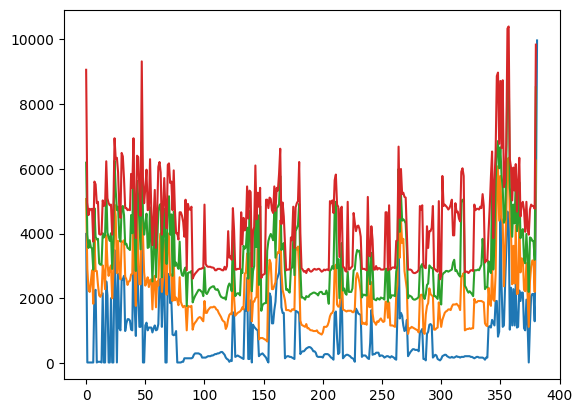

In [4]:
# Down
down_audio = promonet.load.audio('formant-071.wav')
down_formants = promonet.formants.from_audio(down_audio)
for formant in down_formants:
    plt.plot(formant)
ipd.Audio(down_audio, rate=promonet.SAMPLE_RATE)

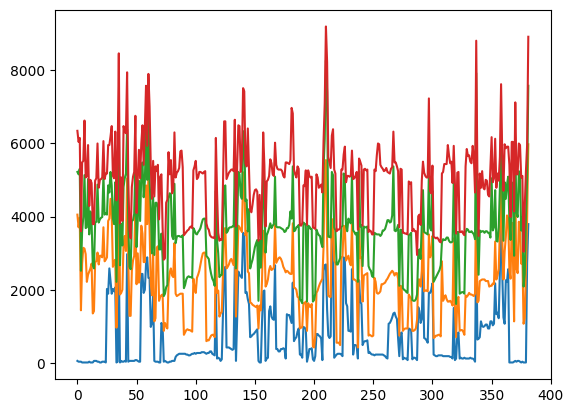

In [5]:
# Up
up_audio = promonet.load.audio('formant-141.wav')
up_formants = promonet.formants.from_audio(up_audio)
for formant in up_formants:
    plt.plot(formant)
ipd.Audio(up_audio, rate=promonet.SAMPLE_RATE)

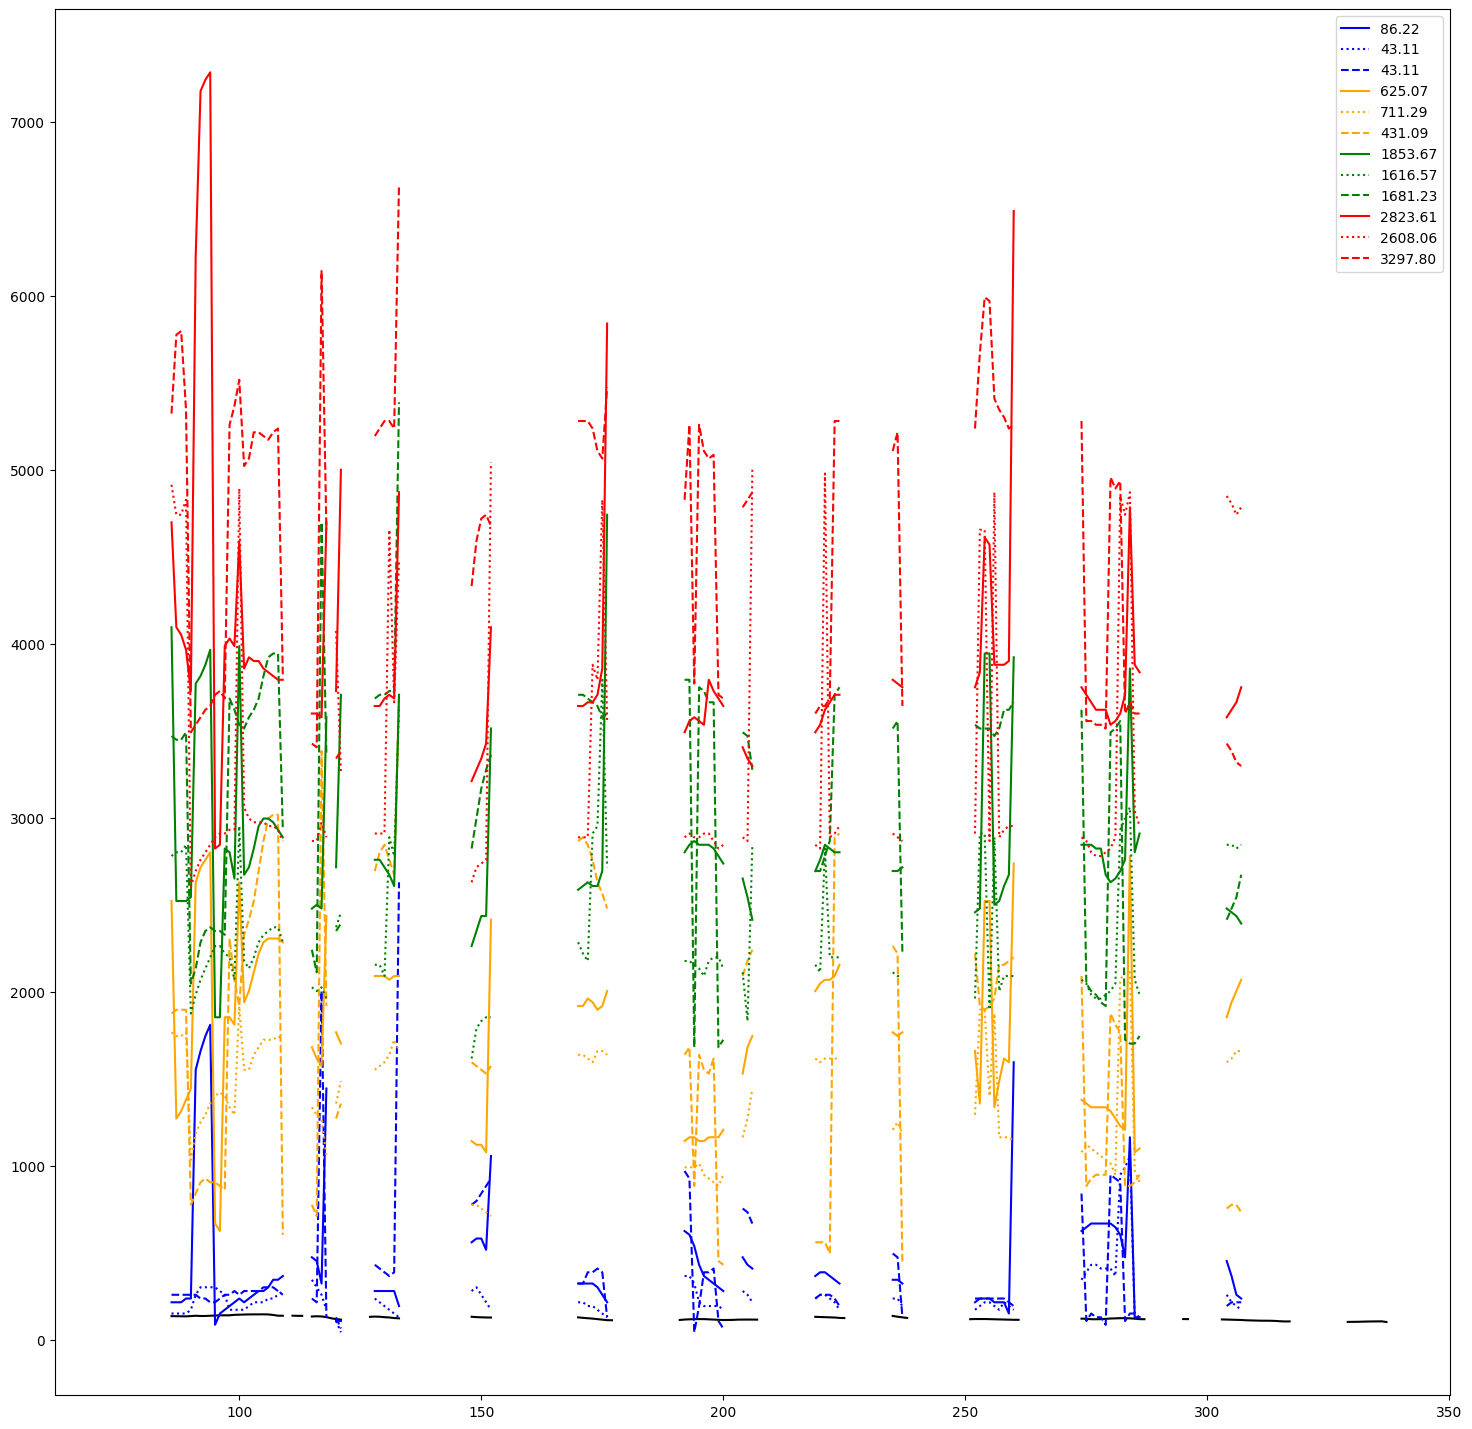

In [15]:
# Visualize all formants
colors = ['blue', 'orange', 'green', 'red']
plt.figure(figsize=(18, 18))
chunk_size = None
voiced = torch.clone(pitch)
voiced[periodicity < promonet.VOICING_THRESHOLD] = float('nan')
plt.plot(voiced[0, :chunk_size], color='black')
for color, original, down, up in zip(
    colors,
    original_formants,
    down_formants,
    up_formants
):
    original, down, up = original[None], down[None], up[None]
    original[periodicity < 2.0 * promonet.VOICING_THRESHOLD] = float('nan')
    down[periodicity < 2.0 * promonet.VOICING_THRESHOLD] = float('nan')
    up[periodicity < 2.0 * promonet.VOICING_THRESHOLD] = float('nan')
    plt.plot(original[0, :chunk_size], color=color, linestyle='solid', label=f'{torch.min(original[~torch.isnan(original)]):.02f}')
    plt.plot(down[0, :chunk_size], color=color, linestyle='dotted', label=f'{torch.min(down[~torch.isnan(down)]):.02f}')
    plt.plot(up[0, :chunk_size], color=color, linestyle='dashed', label=f'{torch.min(up[~torch.isnan(up)]):.02f}')
plt.legend()

In [7]:
# TODO - Viterbi decoding for formant estimation

In [8]:
# Plot formants overlayed on Mel spectrogram
# plt.figure(figsize=(18, 6))

# # Plot Mels
# mels = promonet.preprocess.spectrogram.from_audio(audio, mels=True)
# times = np.linspace(0, promonet.convert.samples_to_seconds(audio.shape[-1]), mels.shape[-1])
# center_frequencies = librosa.mel_frequencies(promonet.NUM_MELS + 2)[1:-1]
# plt.pcolormesh(times, center_frequencies, mels)
# plt.yscale('symlog')

# # Plot pitch
# plt.plot(times, pitch.squeeze())

# # Plot formants
# for formant in formants:
#     plt.plot(times, formant)